Librerías para empezar a hacer el análisis exploratorio

In [2]:
# special IPython command to prepare the notebook for matplotlib
%matplotlib inline 

import pandas as pd
import matplotlib.pyplot as plt

# pd.options.display.mpl_style = 'default'
plt.style.use('ggplot')

Se cargan los datos desde un repositorio público y se despliega la tabla.

In [3]:
url = 'https://raw.githubusercontent.com/JoseAndresMejiasRojas/PF-3121-public-files/main/twitch_game_data_limpio.csv'
ranking = pd.read_csv(url, sep = ',', index_col=0)
ranking.head()

,Game,Month,Year,year_month_date,Hours_watched,Hours_Streamed,Peak_viewers,Peak_channels,Streamers,Avg_viewers,Avg_channels,Avg_viewer_ratio
Rank,,,,,,,,,,,,
1,League of Legends,1,2016,2016-01-01T00:00:00Z,94377226,1362044,530270,2903,129172,127021,1833,69.29
2,Counter-Strike: Global Offensive,1,2016,2016-01-01T00:00:00Z,47832863,830105,372654,2197,120849,64378,1117,57.62
3,Dota 2,1,2016,2016-01-01T00:00:00Z,45185893,433397,315083,1100,44074,60815,583,104.26
4,Hearthstone,1,2016,2016-01-01T00:00:00Z,39936159,235903,131357,517,36170,53749,317,169.29
5,Call of Duty: Black Ops III,1,2016,2016-01-01T00:00:00Z,16153057,1151578,71639,3620,214054,21740,1549,14.03


In [15]:
ranking.describe()

,Month,Year,Hours_watched,Hours_Streamed,Peak_viewers,Peak_channels,Streamers,Avg_viewers,Avg_channels,Avg_viewer_ratio
count,14400.000000,14400.000000,1.440000e+04,1.440000e+04,1.440000e+04,14400.000000,1.440000e+04,14400.000000,14400.000000,14400.000000
mean,6.500000,2018.500000,4.782448e+06,1.571197e+05,5.509512e+04,586.759236,1.722478e+04,6553.785278,214.859097,81.874403
std,3.452172,1.707884,1.667895e+07,5.428111e+05,1.329134e+05,2721.411089,5.453153e+04,22858.599426,743.850310,368.878411
min,1.000000,2016.000000,8.981100e+04,1.900000e+01,4.410000e+02,1.000000,0.000000e+00,120.000000,0.000000,1.950000
25%,3.750000,2017.000000,3.680565e+05,1.221250e+04,8.352500e+03,51.750000,1.479500e+03,504.000000,16.000000,16.120000
50%,6.500000,2018.500000,8.198695e+05,3.163800e+04,2.016950e+04,122.000000,4.126000e+03,1125.000000,43.000000,29.160000
75%,9.250000,2020.000000,2.295376e+06,8.871850e+04,4.598150e+04,318.000000,1.071425e+04,3158.000000,121.000000,57.795000
max,12.000000,2021.000000,3.445520e+08,1.024570e+07,3.123208e+06,129860.000000,1.013029e+06,479209.000000,13789.000000,13601.870000


In [33]:
print("Hours_streamed | Hours_watched corr:", ranking['Hours_Streamed'].corr(ranking['Hours_watched']))
print("Avg_viewers | Hours_watched corr:", ranking['Avg_viewers'].corr(ranking['Hours_watched']))
print("Hours_Streamed | Hours_watched corr:", ranking['Hours_Streamed'].corr(ranking['Hours_watched']))

Hours_streamed | Hours_watched corr: 0.75886239047437
Avg_viewers | Hours_watched corr: 0.9996242410340062
Hours_Streamed | Hours_watched corr: 0.75886239047437


In [24]:
print("Hours_watched mean:", ranking['Hours_Streamed'].mean())

Hours_watched: 157119.73166666666


In [34]:
print("Hours_watched var", ranking["Hours_watched"].var())
print("Avg_viewers var", ranking["Avg_viewers"].var())
print("Hours_watched std", ranking["Hours_watched"].std())
print("Avg_viewers std", ranking["Avg_viewers"].std())

Hours_watched var 278187449849191.34
Avg_viewers var 522515567.70207006


Text(0.5, 0, 'Average viewers')

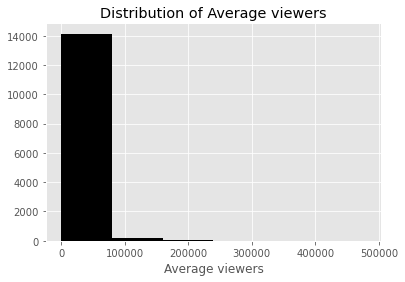

In [9]:
ranking['Avg_viewers'].hist(bins=6, color = 'black')
plt.title('Distribution of Average viewers')
plt.xlabel('Average viewers')

Text(0, 0.5, 'Hours Streamed')

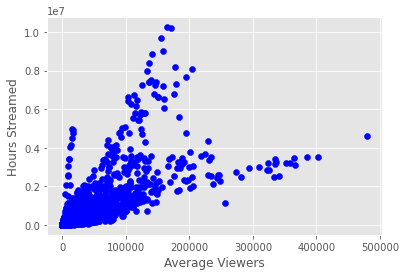

In [12]:
plt.scatter(ranking['Avg_viewers'], ranking['Hours_Streamed'], color = 'blue', alpha = 1)
plt.xlabel('Average Viewers')
plt.ylabel('Hours Streamed')

## Explicación datos
- Correlación: Al ser positivo, indica que entre más horas stremeadas, mayor viewers tendrá el streamer.
- Varianza y desviación estándar: Tenemos un número muy grande en horas vistas y promedio de vistas, lo cual indica que los valores están muy alejados de la media, ie, valores muy distribuidos en el plano.
- Gráficos: A lo que podemos concluir, debido a lo complicado que es el data set, es que un streamer que pueda transmitir más, tendrá un promedio mejor de vistas.

## Dos atributos problemáticos
En este caso en particular es un poco complicado realizar alguna de las técnicas dado que el data set está muy limpio. Sin embargo, sí es claro que atributos que tenga que ver con channels no aportarán tanto dado que se sale del alcance de las preguntas. Recordando que lo que se quiere calcular es audiencia. Las columnas que no aportarían serían Peak_channels, Avg_channels, y Streamers. Hours_Streamed sí puede aportar ya que puede haber una relación entre horas transmitidas y la audiencia.